In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
X = df.iloc[:, :-1].values

In [5]:
y = df.iloc[:, -1].values

### Feature scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))

In [8]:
X_scaled = scaler.fit_transform(X)

### Training

In [9]:
from minisom import MiniSom

In [10]:
som = MiniSom(10, 10, input_len=15)

In [11]:
som.random_weights_init(X)

In [12]:
som.train_random(X, num_iteration=100)

### Visualizing results

In [13]:
from pylab import bone, pcolor, colorbar, plot, show

In [15]:
bone()

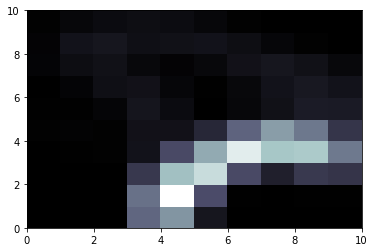

In [16]:
pcolor(som.distance_map().T)

In [17]:
colorbar()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

- Red cirles => Didn't get approval. Green circles => Got approval

In [18]:
markers = ['o', 's']
colors = ['r', 'g']

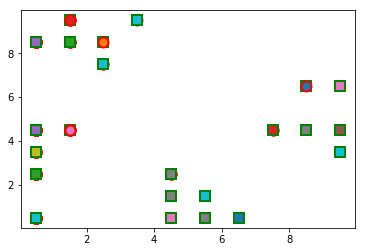

In [21]:
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] +0.5, w[1] +0.5,
        markers[y[i]],
        markeredgecolor=colors[y[i]],
        markerfacecolor=None,
        markersize=10,
        markeredgewidth=2)

In [22]:
show()

### Finding the frauds

In [25]:
mappings = som.win_map(X_scaled)

In [29]:
mappings

defaultdict(list,
            {(0,
              4): [array([ 0.69609056,  0.        ,  0.13413534,  0.25      ,  0.5       ,
                      0.53846154,  0.375     ,  0.00578947,  0.        ,  0.        ,
                      0.        ,  0.        ,  0.5       ,  0.08      ,  0.        ]), array([ 0.38898166,  0.        ,  0.23804511,  0.0625    ,  0.        ,
                      0.23076923,  0.375     ,  0.04385965,  0.        ,  0.        ,
                      0.        ,  1.        ,  0.5       ,  0.14      ,  0.        ]), array([ 0.02165147,  0.        ,  0.0312782 ,  0.02089286,  0.5       ,
                      0.53846154,  0.875     ,  0.05263158,  1.        ,  1.        ,
                      0.02985075,  0.        ,  0.5       ,  0.05      ,  0.        ]), array([ 0.08079959,  1.        ,  0.41609023,  0.17857143,  0.5       ,
                      0.76923077,  0.875     ,  0.1754386 ,  1.        ,  1.        ,
                      0.08955224,  1.        ,  0.

In [37]:
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis=0)

In [38]:
frauds

array([], dtype=float64)

In [39]:
scaler.inverse_transform(frauds)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
import pdb
pdb.set_trace()

--Call--
> /Users/shubhamgupta/shubham/udemy_dl/.env/lib/python3.6/site-packages/IPython/core/displayhook.py(247)__call__()
-> def __call__(self, result=None):
(Pdb) continue
